In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline
sns.set(style="whitegrid")

# Load your file
df = pd.read_csv('/content/startup_funding.csv')

# Clean column names
df.columns = df.columns.str.strip().str.replace("  ", " ")

# Rename for clarity
df = df.rename(columns={
    'City Location': 'City',
    'Amount in USD': 'Funding Amount',
    'Date dd/mm/yyyy': 'Date',
    'InvestmentnType': 'Funding Type',
    'Investors Name': 'Investor'
})

df.head()


,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investor,Funding Type,Funding Amount,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df.columns = df.columns.str.strip()
df.isnull().sum()


,0
Sr No,0
Date,0
Startup Name,0
Industry Vertical,171
SubVertical,936
City,180
Investor,24
Funding Type,4
Funding Amount,960
Remarks,2625


In [ ]:
# Drop rows with missing important info
df = df.dropna(subset=['Startup Name', 'City', 'Funding Amount'])

# Remove commas, $, and drop 'undisclosed' rows
df['Funding Amount'] = df['Funding Amount'].replace('[\$,]', '', regex=True)

# Remove rows with non-numeric values (like 'undisclosed')
df = df[df['Funding Amount'].str.replace(',', '').str.replace('.', '', 1).str.isnumeric()]

# Convert to float safely
df['Funding Amount'] = df['Funding Amount'].astype(float)


# Standardize city names
df['City'] = df['City'].str.strip().str.title()

# Convert date and extract year
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year

df.head()



/tmp/ipython-input-18-4035900718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Funding Amount'] = df['Funding Amount'].replace('[\$,]', '', regex=True)


,Sr No,Date,Startup Name,Industry Vertical,SubVertical,City,Investor,Funding Type,Funding Amount,Remarks,Year
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,2020.0
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,2020.0
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,2020.0
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,2020.0
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,2020.0


/tmp/ipython-input-19-3347542713.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Funding Amount', data=funding_by_year, palette='crest')


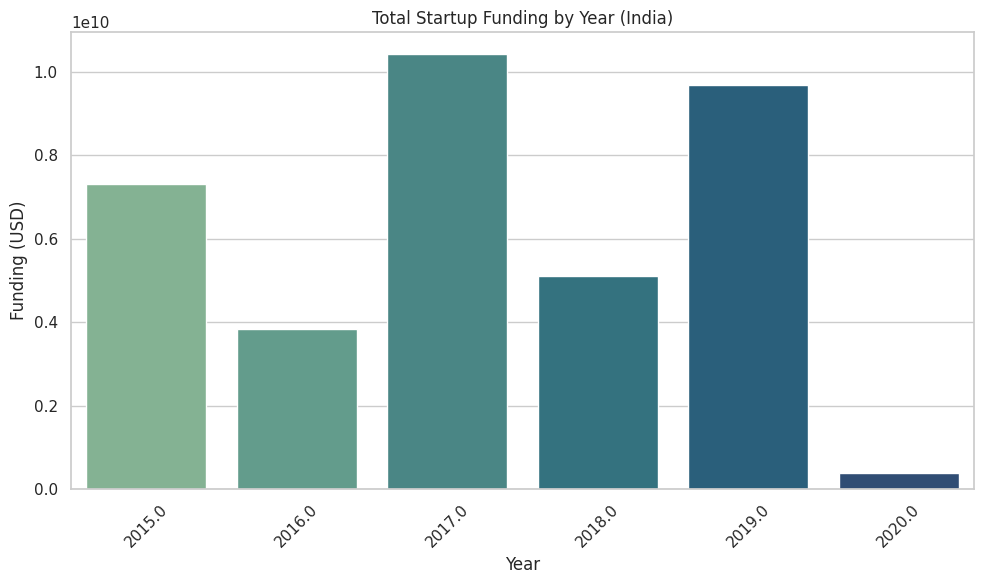

In [ ]:
funding_by_year = df.groupby('Year')['Funding Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='Year', y='Funding Amount', data=funding_by_year, palette='crest')
plt.title("Total Startup Funding by Year (India)")
plt.ylabel("Funding (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-20-822158131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')


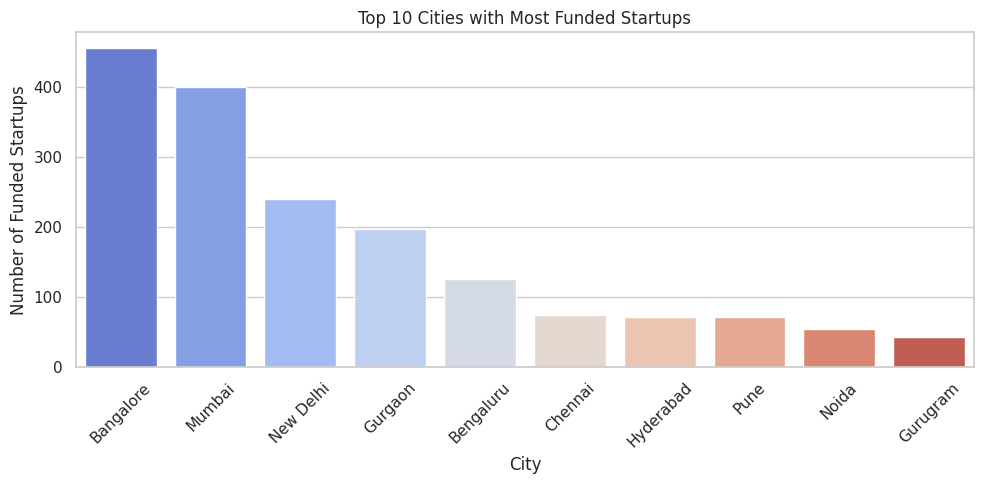

In [ ]:
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.title("Top 10 Cities with Most Funded Startups")
plt.ylabel("Number of Funded Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-21-3891738977.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='magma')


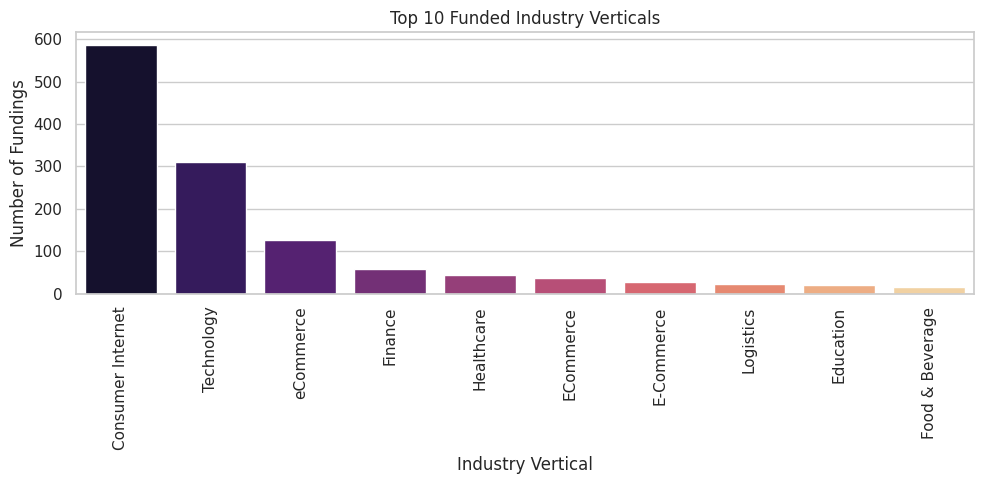

In [ ]:
top_sectors = df['Industry Vertical'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_sectors.index, y=top_sectors.values, palette='magma')
plt.title("Top 10 Funded Industry Verticals")
plt.ylabel("Number of Fundings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-22-1384893913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_investors.index, x=top_investors.values, palette='YlGnBu')


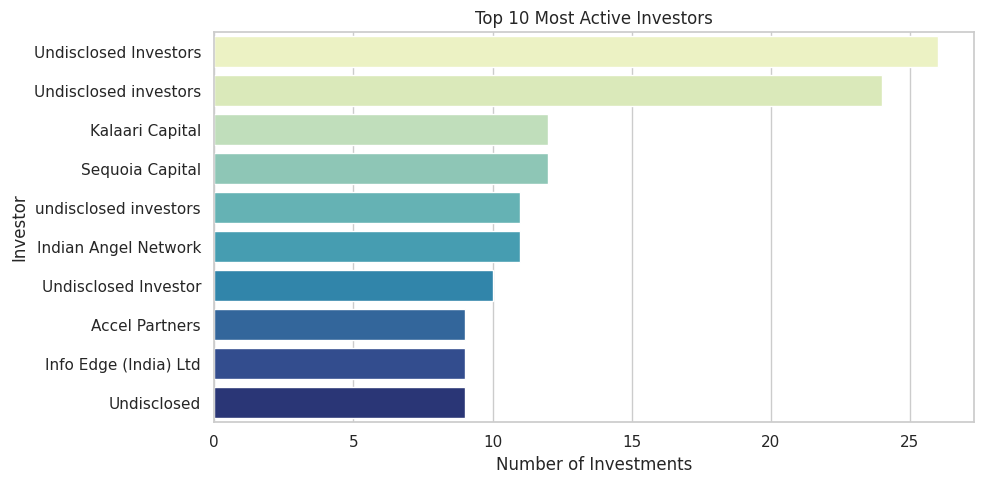

In [ ]:
top_investors = df['Investor'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_investors.index, x=top_investors.values, palette='YlGnBu')
plt.title("Top 10 Most Active Investors")
plt.xlabel("Number of Investments")
plt.tight_layout()
plt.show()
